In [28]:
#imports
import pandas
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import numpy 
from scipy.cluster.hierarchy import fcluster

In [69]:
#read in mash file removing genomes compared to themselves
distances = [x.split()[0:3] for x in open("90/mash_pairwise_distances.txt","r")]

In [70]:
dfLabels = ['genome1','genome2','distance']
df = pandas.DataFrame.from_records(distances,columns=dfLabels)
df['distance'] = df['distance'].astype(float) 

In [71]:
df.head()


,genome1,genome2,distance
0,BK11_02_90%.fasta,BK11_02_90%.fasta,0.000000
1,BS11_05_90%.fasta,BK11_02_90%.fasta,0.023004
2,BS13_02_90%.fasta,BK11_02_90%.fasta,0.061071
3,BS13_10_90%.fasta,BK11_02_90%.fasta,0.026479
4,F13_15_90%.fasta,BK11_02_90%.fasta,0.057440


In [72]:
#long to wide pivot(row-names, col-names, value)
df = df.pivot('genome1', 'genome2', 'distance')
df


genome2,BK11_02_90%.fasta,BS11_05_90%.fasta,BS13_02_90%.fasta,BS13_10_90%.fasta,F13_15_90%.fasta,G11_01_90%.fasta,G11_04_90%.fasta,G11_06_90%.fasta,G11_09_90%.fasta,G13-07_90%.fasta,...,S11_05_90%.fasta,SX13-01_90%.fasta,SX13_11_90%.fasta,W11_03_90%.fasta,W11_06_90%.fasta,W13_11_90%.fasta,W13_13_90%.fasta,W13_15_90%.fasta,W13_16_90%.fasta,W13_18_90%.fasta
genome1,,,,,,,,,,,,,,,,,,,,,
BK11_02_90%.fasta,0.000000,0.023004,0.061071,0.026479,0.057440,0.025566,0.024526,0.025566,0.024214,0.026905,...,0.018620,0.027513,0.026991,0.047344,0.047688,0.059330,0.023602,0.024526,0.025322,0.016668
BS11_05_90%.fasta,0.023004,0.000000,0.061326,0.019181,0.054570,0.020546,0.017184,0.020280,0.017712,0.019563,...,0.024214,0.019821,0.020214,0.048211,0.048386,0.063439,0.010483,0.011309,0.011044,0.024137
BS13_02_90%.fasta,0.061071,0.061326,0.000000,0.065394,0.050014,0.064544,0.058373,0.062367,0.061071,0.060817,...,0.060565,0.062104,0.060565,0.050575,0.051530,0.054359,0.058610,0.058848,0.059819,0.060066
BS13_10_90%.fasta,0.026479,0.019181,0.065394,0.000000,0.059819,0.020479,0.014456,0.020412,0.014100,0.019627,...,0.026310,0.020280,0.019118,0.052117,0.052714,0.061843,0.020280,0.021780,0.020747,0.025894
F13_15_90%.fasta,0.057440,0.054570,0.050014,0.059819,0.000000,0.058137,0.056532,0.060565,0.057440,0.059819,...,0.056532,0.056983,0.058373,0.052714,0.052915,0.057671,0.055428,0.055428,0.054359,0.055428
G11_01_90%.fasta,0.025566,0.020546,0.064544,0.020479,0.058137,0.000000,0.019371,0.015081,0.018011,0.019627,...,0.026648,0.014456,0.014100,0.048563,0.049100,0.063168,0.019055,0.022277,0.020412,0.026905
G11_04_90%.fasta,0.024526,0.017184,0.058373,0.014456,0.056532,0.019371,0.000000,0.018496,0.010870,0.018313,...,0.024921,0.019692,0.018252,0.047004,0.047174,0.059089,0.017891,0.020412,0.019627,0.024214
G11_06_90%.fasta,0.025566,0.020280,0.062367,0.020412,0.060565,0.015081,0.018496,0.000000,0.019245,0.019435,...,0.027601,0.016499,0.013016,0.046668,0.047516,0.061843,0.021361,0.021920,0.022205,0.026819
G11_09_90%.fasta,0.024214,0.017712,0.061071,0.014100,0.057440,0.018011,0.010870,0.019245,0.000000,0.019245,...,0.024683,0.018867,0.018192,0.047516,0.048035,0.057211,0.018620,0.020214,0.019563,0.024137


In [73]:
matrix = df.values
matrix

array([[0.        , 0.0230043 , 0.0610707 , ..., 0.0245258 , 0.0253218 ,
        0.0166683 ],
       [0.0230043 , 0.        , 0.0613264 , ..., 0.0113086 , 0.0110444 ,
        0.0241368 ],
       [0.0610707 , 0.0613264 , 0.        , ..., 0.0588483 , 0.059819  ,
        0.0600659 ],
       ...,
       [0.0245258 , 0.0113086 , 0.0588483 , ..., 0.        , 0.00708822,
        0.0233762 ],
       [0.0253218 , 0.0110444 , 0.059819  , ..., 0.00708822, 0.        ,
        0.0233762 ],
       [0.0166683 , 0.0241368 , 0.0600659 , ..., 0.0233762 , 0.0233762 ,
        0.        ]])

In [74]:
#clustering
#condense matrix
matCond = squareform(matrix)
#calculate linkage
Z = linkage(matCond,'ward')

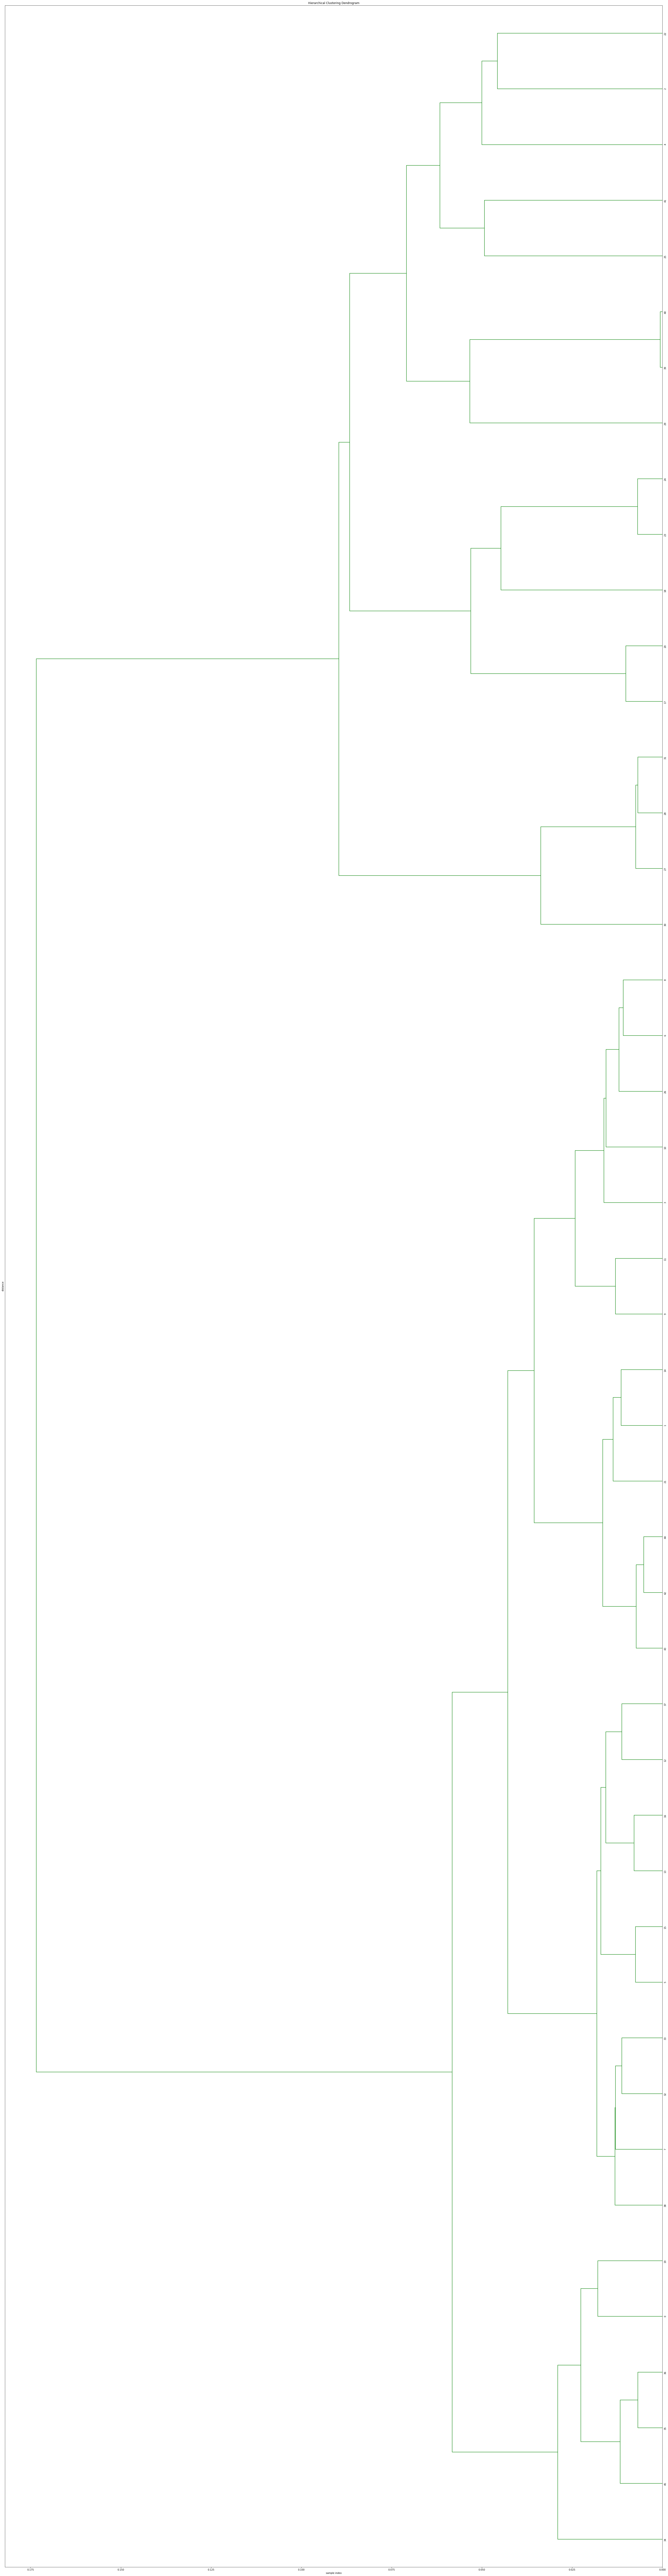

In [75]:
#plot dendogram from mash distance
plt.figure(figsize=(50,200))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=10.,
    color_threshold=2,
    truncate_mode='lastp',
    p=500,
    orientation='left'
)
plt.show()

In [76]:
#select clusters 
clusters=fcluster(Z,2,'distance')
clusterDF=pandas.DataFrame({'genome':df.columns.tolist() , 'cluster':clusters})
clusterDF.head()
clusterDF.to_csv('90/clusterAssignment.tsv',sep="\t")